#### 00 - Exploratory Data Analysis and Feature Engineering

This notebook performs initial Exploratory Data Analysis (EDA) on the provided dataset, preprocesses the data for machine learning, and engineers new features. The goal is to prepare the data for training a classification model to predict `Personality` (Extrovert/Introvert).


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

train_df = pd.read_csv("../data/raw/train.csv") 
test_df = pd.read_csv("../data/raw/test.csv")



In [32]:

renamed_columns = {'Time_spent_Alone' : 'time_spent_alone', 'Stage_fear' : 'stage_fear', 'Social_event_attendance' : 'social_event_attendance',
       'Going_outside':'going_outside', 'Drained_after_socializing':'drained_after_socializing', 'Friends_circle_size':'friends_circle_size',
       'Post_frequency':'post_frequency', 'Personality':'personality'}
train_df.drop(columns = 'id', inplace = True)
train_df.rename(columns = renamed_columns , inplace=True)
display(train_df.head())
print("# of unique values per column in training data\n") 
display(train_df.nunique()) 
print("   ") 
print("# of unknown values per column in training data\n")
display(train_df.isnull().sum()) 

,time_spent_alone,stage_fear,social_event_attendance,going_outside,drained_after_socializing,friends_circle_size,post_frequency,personality
0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


# of unique values per column in training data



time_spent_alone             12
stage_fear                    2
social_event_attendance      11
going_outside                 8
drained_after_socializing     2
friends_circle_size          16
post_frequency               11
personality                   2
dtype: int64

   
# of unknown values per column in training data



time_spent_alone             1190
stage_fear                   1893
social_event_attendance      1180
going_outside                1466
drained_after_socializing    1149
friends_circle_size          1054
post_frequency               1264
personality                     0
dtype: int64

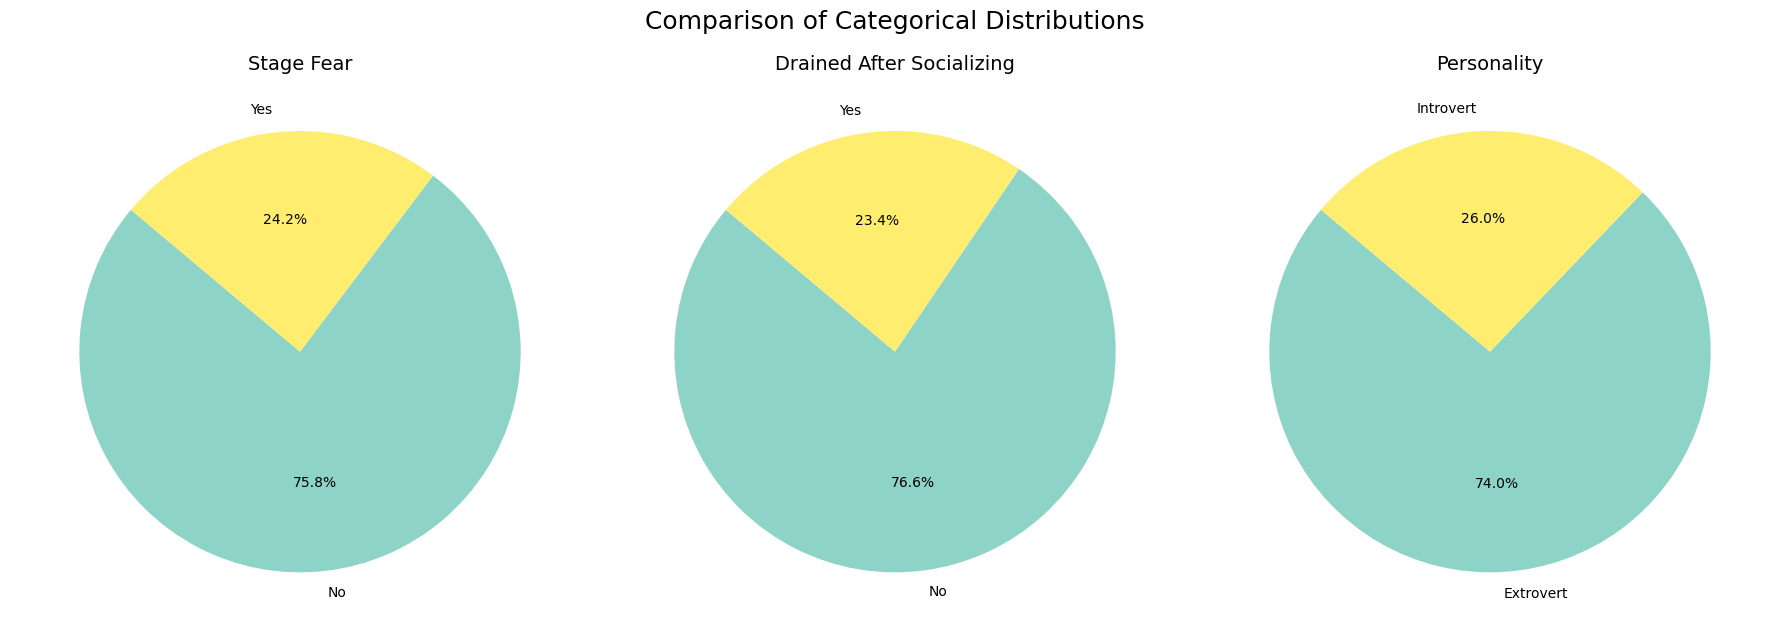

In [37]:
# --- Step 1: Find columns with fewer than 4 unique values ---
pie_chart_cols = []
for column in train_df.columns: 
    unique_count = train_df[column].nunique() 
    if unique_count < 4:
        pie_chart_cols.append(column)

# --- Step 2: Limit to exactly 3 columns for the side-by-side layout ---
assert len(pie_chart_cols) >= 3, "Need at least 3 categorical columns to plot"
pie_chart_cols = pie_chart_cols[:3]  # Take first 3

# --- Step 3: Create 1 row with 3 columns ---
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))  # 6 inches per chart
cmap = plt.colormaps.get_cmap("Set3")

# --- Step 4: Plot each pie chart ---
for i, col in enumerate(pie_chart_cols):
    data = train_df[col].value_counts()
    labels = data.index
    sizes = data.values
    colors = cmap(np.linspace(0, 1, len(sizes)))

    wedges, texts, autotexts = axes[i].pie(
        sizes,
        labels=labels,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors,
        textprops={'fontsize': 10}
    )
    axes[i].set_title(col.replace('_', ' ').title(), fontsize=14)
    axes[i].axis('equal')

plt.tight_layout()
plt.suptitle("Comparison of Categorical Distributions", fontsize=18, y=1.05)
plt.show()



In [28]:
numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numerical Columns:", numerical_cols)

Numerical Columns: ['time_spent_alone', 'social_event_attendance', 'going_outside', 'friends_circle_size', 'post_frequency']


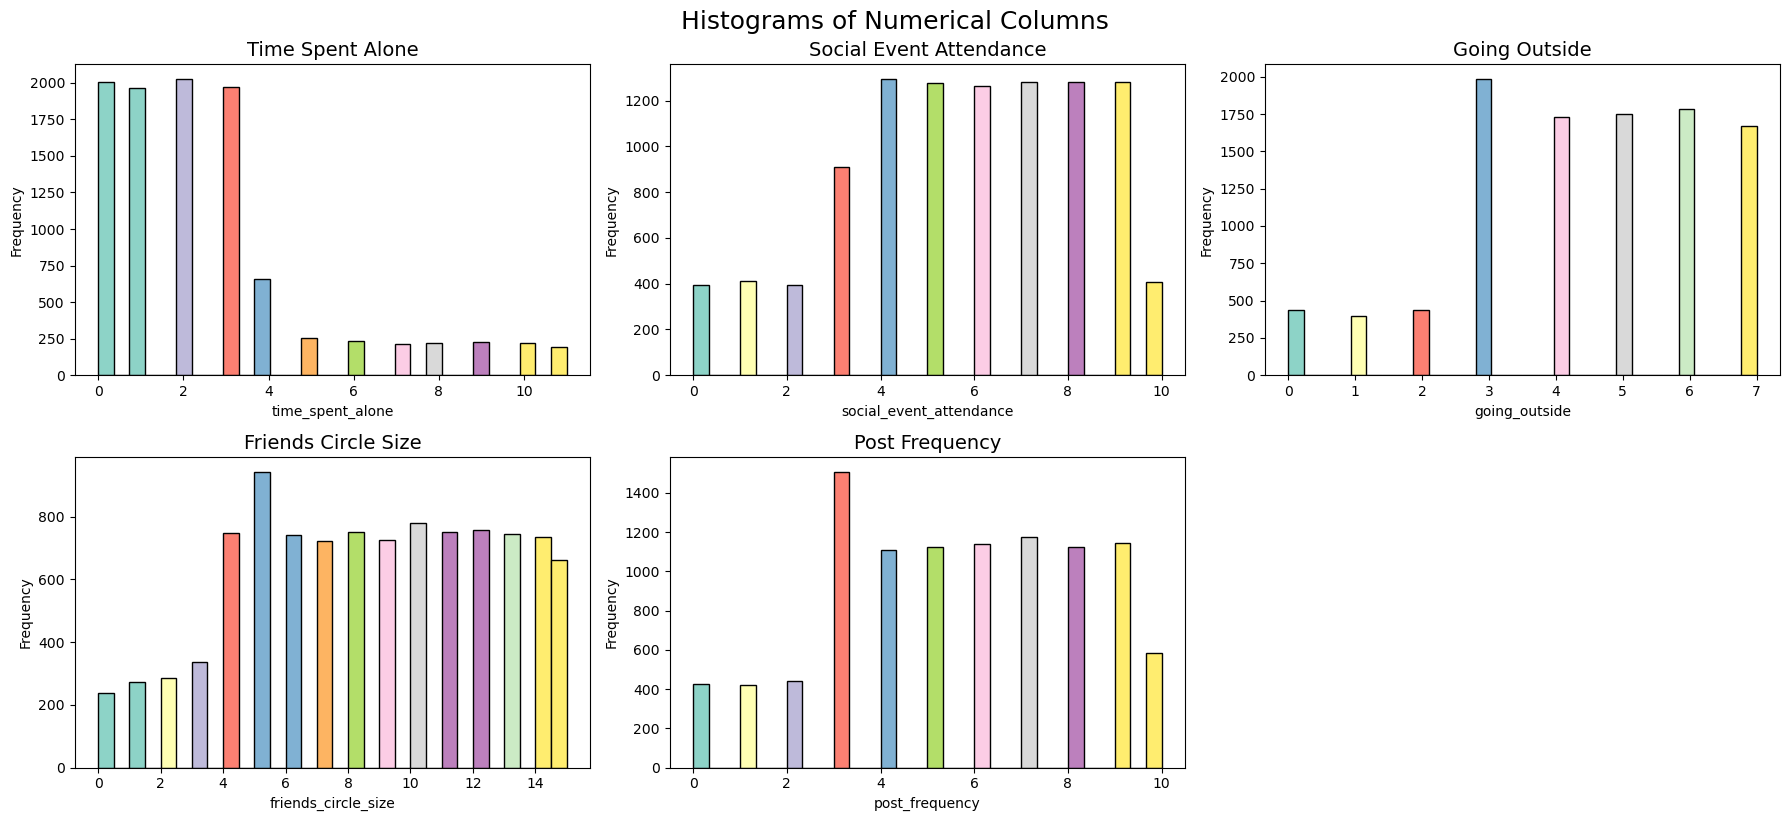

In [41]:
num_plots = len(numerical_cols)

max_cols = 3
rows = math.ceil(num_plots / max_cols)
cols = min(num_plots, max_cols)

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(6 * cols, 4 * rows))

# If only one plot, axes may not be array, so force it to array for consistency
if num_plots == 1:
    axes = np.array([axes])
else:
    axes = axes.flatten()

cmap = plt.colormaps.get_cmap("Set3")

for i, col in enumerate(numerical_cols):
    data = train_copy[col].dropna()
    counts, bins, patches = axes[i].hist(data, bins=30, edgecolor='black')

    # Apply colors from cmap to each bar
    n_colors = len(patches)
    colors = cmap(np.linspace(0, 1, n_colors))
    for patch, color in zip(patches, colors):
        patch.set_facecolor(color)

    axes[i].set_title(col.replace('_', ' ').title(), fontsize=14)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide unused axes if any
for j in range(num_plots, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.suptitle("Histograms of Numerical Columns", fontsize=18, y=1.02)
plt.show()

### Personality and Social Behavior Overview

The dataset consists of 74% extroverts, who are generally expected to post more frequently, attend more events, go outside more often, spend less time alone, and maintain larger friend groups. These tendencies are clearly reflected in the histograms shown above.

Time Spent Alone
Time spent alone ranges from 0 to 10 hours, with a strongly right-skewed distribution. Most individuals prefer spending between 0 and 3.5 hours alone, and the frequency drops sharply as time spent alone increases. This indicates that people in the dataset generally favor spending less time alone.

Social Event Attendance
Event attendance ranges from 0 to 10 events. The distribution is multimodal, with a smaller peak in the 0–3 range, followed by a rapid increase in frequency between 3 and 9 events, then tapering off near 10. This pattern suggests that a majority of individuals prefer to attend social events regularly.

Going Outside
The frequency of leaving the house ranges from 0 to 7. Most individuals tend to leave the house frequently, as evidenced by the peak in the 3–7 range, reflecting active social engagement.

Friend Circle Size
Friend group sizes vary from 0 to 15, with a majority falling between 4 and 15. This highlights that most people in the dataset maintain relatively large social circles.

Post Frequency
Post frequency ranges from 0 to 10, with a peak at 3 posts. There is a gradual decrease in frequency as the number of posts increases, suggesting that while many individuals post regularly, fewer post very frequently.

In [26]:
train_copy = train_df.copy()
train_copy.dropna(inplace=True)
train_copy.drop(columns='id', inplace=True)

print(" ") 
display(train_copy.head())


,time_spent_alone,stage_fear,social_event_attendance,going_outside,drained_after_socializing,friends_circle_size,post_frequency,personality
0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
7,2.0,No,8.0,3.0,No,4.0,5.0,Extrovert
9,1.0,No,8.0,6.0,No,14.0,9.0,Extrovert


In [16]:

train_copy[numerical_cols].describe()


Numerical Columns: ['time_spent_alone', 'social_event_attendance', 'going_outside', 'friends_circle_size', 'post_frequency']


,time_spent_alone,social_event_attendance,going_outside,friends_circle_size,post_frequency
count,10189.000000,10189.000000,10189.000000,10189.000000,10189.000000
mean,2.633134,5.681519,4.444793,8.503092,5.500834
std,2.630621,2.597142,1.884790,4.073302,2.709847
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,4.000000,3.000000,5.000000,3.000000
50%,2.000000,6.000000,5.000000,9.000000,6.000000
75%,3.000000,8.000000,6.000000,12.000000,8.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000
